In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk


In [2]:
#converting to dataframes AND encoding ='ISO-8859-1' to read different language or emotions

df_train = pd.read_csv("train.txt",delimiter=';', header=None, names=['sentence','label'],encoding='ISO-8859-1')
print(df_train)

df_test = pd.read_csv("test.txt",delimiter=';', header=None, names=['sentence','label'],encoding='ISO-8859-1')
print(df_test)

df_val = pd.read_csv("val.txt",delimiter=';', header=None, names=['sentence','label'],encoding='ISO-8859-1')
print(df_val)



                                                sentence    label
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]
                                               sentence    label
0     im feeling rather rotten so im not very ambiti...  sadness
1             im updating my blog because i feel shi

In [3]:
#combining data_frames
combined_df = pd.concat([df_train, df_test,df_val], axis=0, ignore_index=True)
combined_df


,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [4]:
combined_df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
combined_df.tail()

,sentence,label
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy
19999,i feel like i just wanna buy any cute make up ...,joy


In [6]:
combined_df.dtypes

sentence    object
label       object
dtype: object

In [7]:
combined_df['label'].value_counts()

label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

C:\Users\neham\AppData\Local\Temp\ipykernel_292\1873764906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=label_counts, palette='pastel')


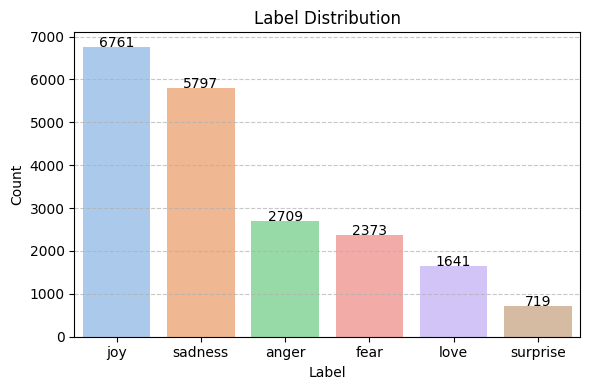

In [13]:
# Plot

label_counts = combined_df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='Count', data=label_counts, palette='pastel')
plt.title("Label Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add value labels above bars
for i, row in label_counts.iterrows():
    plt.text(i, row['Count'] + 1, int(row['Count']), ha='center')

plt.tight_layout()
plt.show()

C:\Users\neham\AppData\Local\Temp\ipykernel_292\2828597390.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=label_counts, palette='pastel')


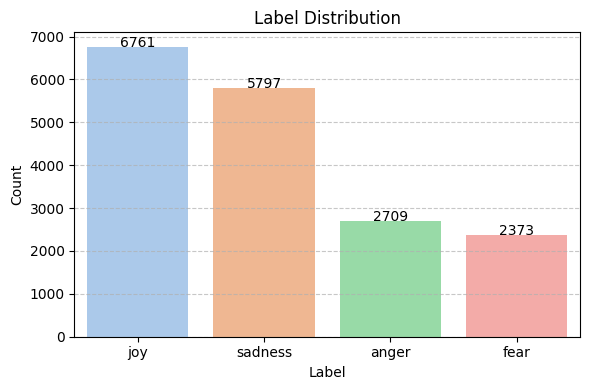

In [15]:
#we can drop love and surprise due to less number, also there will be indexing issue so correct it here 

combined_df.drop(combined_df.index[combined_df['label'].isin(['love','surprise'])], axis=0, inplace=True) #dropping rows (axis=0) with love and surprise label
combined_df.reset_index(drop=True,inplace=True)   #indexing correction
    

# Plot

label_counts = combined_df['label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='Count', data=label_counts, palette='pastel')
plt.title("Label Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add value labels above bars
for i, row in label_counts.iterrows():
    plt.text(i, row['Count'] + 1, int(row['Count']), ha='center')

plt.tight_layout()
plt.show()
    


In [16]:
#STEP 3: ASSIGING VALUES TO LABELS USING MAP



combined_df['label']=combined_df['label'].map({'fear':0,'anger':1,'sadness':2,'joy':3})
print(combined_df)

                                                sentence  label
0                                i didnt feel humiliated      2
1      i can go from feeling so hopeless to so damned...      2
2       im grabbing a minute to post i feel greedy wrong      1
3                                   i am feeling grouchy      1
4      ive been feeling a little burdened lately wasn...      2
...                                                  ...    ...
17635  im having ssa examination tomorrow in the morn...      2
17636  i constantly worry about their fight against n...      3
17637  i feel its important to share this info for th...      3
17638  i truly feel that if you are passionate enough...      3
17639  i feel like i just wanna buy any cute make up ...      3

[17640 rows x 2 columns]


In [79]:
#STEP4: NLP ON SENTENCE COLUMN

#RESOURCES downloading 
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\neham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\neham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
#assiging sentence to a variable df=df.sentence or

emotions=combined_df['sentence']
emotions


0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3                                     i am feeling grouchy
4        ive been feeling a little burdened lately wasn...
                               ...                        
17635    im having ssa examination tomorrow in the morn...
17636    i constantly worry about their fight against n...
17637    i feel its important to share this info for th...
17638    i truly feel that if you are passionate enough...
17639    i feel like i just wanna buy any cute make up ...
Name: sentence, Length: 17640, dtype: object

In [18]:
#STEP 5: TOKENIZATION

from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
emotions=emotions.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
emotions

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3                                     i am feeling grouchy
4        ive been feeling a little burdened lately wasn...
                               ...                        
17635    im having ssa examination tomorrow in the morn...
17636    i constantly worry about their fight against n...
17637    i feel its important to share this info for th...
17638    i truly feel that if you are passionate enough...
17639    i feel like i just wanna buy any cute make up ...
Name: sentence, Length: 17640, dtype: object

In [19]:
#STEP6: REPLACE SPECIAL CHARACTERS USING SPACE IF ANY
emotions=emotions.str.replace('[^a-zA-Z0-9]',' ',regex=True)
emotions

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3                                     i am feeling grouchy
4        ive been feeling a little burdened lately wasn...
                               ...                        
17635    im having ssa examination tomorrow in the morn...
17636    i constantly worry about their fight against n...
17637    i feel its important to share this info for th...
17638    i truly feel that if you are passionate enough...
17639    i feel like i just wanna buy any cute make up ...
Name: sentence, Length: 17640, dtype: object

In [20]:
#STEP 7: COLLECTING WORDS ABOVE LENGTH 3

emotions=emotions.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
emotions

0                                    didnt feel humiliated
1        can from feeling hopeless damned hopeful just ...
2                   grabbing minute post feel greedy wrong
3                                          feeling grouchy
4        ive been feeling little burdened lately wasnt ...
                               ...                        
17635    having ssa examination tomorrow the morning qu...
17636    constantly worry about their fight against nat...
17637    feel its important share this info for those t...
17638    truly feel that you are passionate enough abou...
17639    feel like just wanna buy any cute make see onl...
Name: sentence, Length: 17640, dtype: object

In [21]:
#STEP7: STEMMING and LOWERCASE CONVERTION
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')

emotions=emotions.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
print(emotions)


0                                        didnt feel humili
1        can from feel hopeless damn hope just from be ...
2                        grab minut post feel greedi wrong
3                                             feel grouchi
4        ive been feel littl burden late wasnt sure whi...
                               ...                        
17635    have ssa examin tomorrow the morn quit well pr...
17636    constant worri about their fight against natur...
17637    feel it import share this info for those that ...
17638    truli feel that you are passion enough about s...
17639    feel like just wanna buy ani cute make see onl...
Name: sentence, Length: 17640, dtype: object


In [22]:
#STEP8: STOP WORD REMOVAL
from nltk.corpus import stopwords
stop=stopwords.words('english')

emotions=emotions.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
print(emotions)


0                                        didnt feel humili
1          feel hopeless damn hope around someon care awak
2                        grab minut post feel greedi wrong
3                                             feel grouchi
4                ive feel littl burden late wasnt sure whi
                               ...                        
17635    ssa examin tomorrow morn quit well prepar come...
17636    constant worri fight natur push limit inner bo...
17637                  feel import share info experi thing
17638    truli feel passion enough someth stay true suc...
17639    feel like wanna buy ani cute make see onlin ev...
Name: sentence, Length: 17640, dtype: object


In [23]:
#STEP 9: VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(emotions)
data


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 156377 stored elements and shape (17640, 10404)>

In [24]:
#STEP 10: output df
y=combined_df['label'].values
print(y)


[2 2 1 ... 3 3 3]


In [25]:
#input===> data_train, data_test
#output===>y_train, y_test

#STEP 11: MODEL CREATION SPLITTING x and y
#MODEL CLASSIFICATION USING SUPERVISED ML DIFF ALGORITHMS

#STEP 7: SPLITTING DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)



In [30]:
y_test

array([3, 3, 2, ..., 1, 2, 1], shape=(5292,))


Model: Logistic Regression
Accuracy: 0.8832199546485261
Classification Report:
               precision    recall  f1-score   support

         joy       0.90      0.75      0.82       744
     sadness       0.90      0.75      0.82       781
       anger       0.89      0.91      0.90      1761
        fear       0.87      0.96      0.91      2006

    accuracy                           0.88      5292
   macro avg       0.89      0.84      0.86      5292
weighted avg       0.88      0.88      0.88      5292

Confusion Matrix:
 [[1922   61   12   11]
 [  97 1611   31   22]
 [  93   77  585   26]
 [  99   69   20  556]]


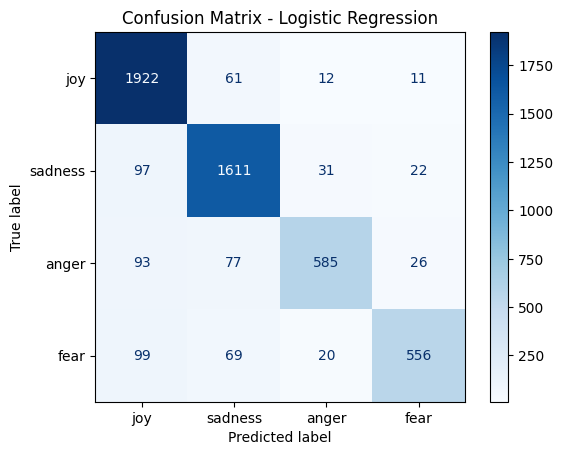


Model: KNN
Accuracy: 0.8063114134542706
Classification Report:
               precision    recall  f1-score   support

         joy       0.77      0.75      0.76       744
     sadness       0.73      0.74      0.73       781
       anger       0.80      0.83      0.81      1761
        fear       0.86      0.83      0.85      2006

    accuracy                           0.81      5292
   macro avg       0.79      0.79      0.79      5292
weighted avg       0.81      0.81      0.81      5292

Confusion Matrix:
 [[1674  189   79   64]
 [ 139 1456   96   70]
 [  66  102  576   37]
 [  68   77   38  561]]


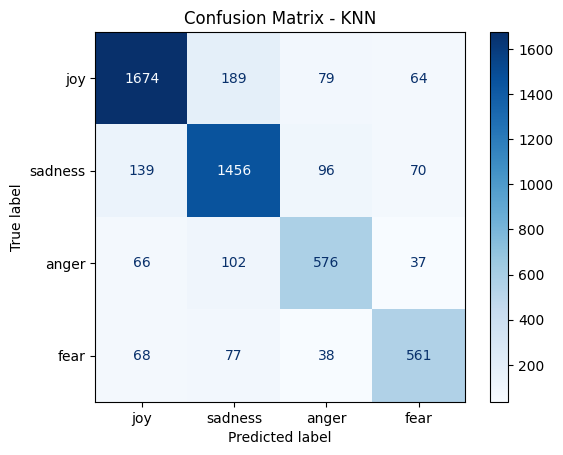


Model: SVC
Accuracy: 0.877739984882842
Classification Report:
               precision    recall  f1-score   support

         joy       0.92      0.73      0.81       744
     sadness       0.88      0.75      0.81       781
       anger       0.89      0.91      0.90      1761
        fear       0.86      0.96      0.91      2006

    accuracy                           0.88      5292
   macro avg       0.89      0.84      0.86      5292
weighted avg       0.88      0.88      0.88      5292

Confusion Matrix:
 [[1918   53   19   16]
 [ 105 1595   37   24]
 [ 101   84  587    9]
 [ 104   70   25  545]]


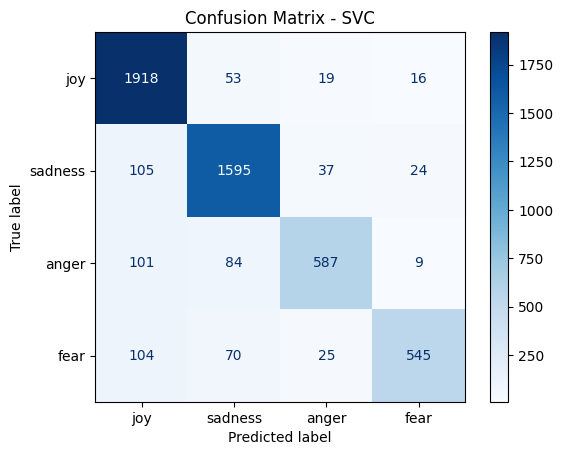

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# emotion labels and their numeric order
label_order = [3, 2, 1, 0]  # joy, sadness, anger, fear
emotion_labels = ['joy', 'sadness', 'anger', 'fear']  # matches label_order

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)

    acc = accuracy_score(y_test, y_preds)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_preds, target_names=emotion_labels))
    results[name] = acc

    # Confusion matrix using predefined label order
    cm = confusion_matrix(y_test, y_preds, labels=label_order)
    print("Confusion Matrix:\n", cm)

    # Display with correct emotion labels
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
    cmd.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
